In [1]:
import cv2
from PIL import Image
import numpy as np

# Understand the difference RGB, BGR, HSV, Grayscale

Run RGB_BGR_HSV_Grayscale.py to see all of different channels visually

# RGB vs HSV Detailed Explanation

RGB (Red, Green, Blue) is an additive color model where colors are represented as combinations of red, green, and blue values.
![HSV Image](./data/RGB_color_space.png)

HSV (Hue, Saturation, Value) is another color space that is more intuitive for humans, as it separates chromatic content from brightness.

![HSV Image](./data/hsv.webp)

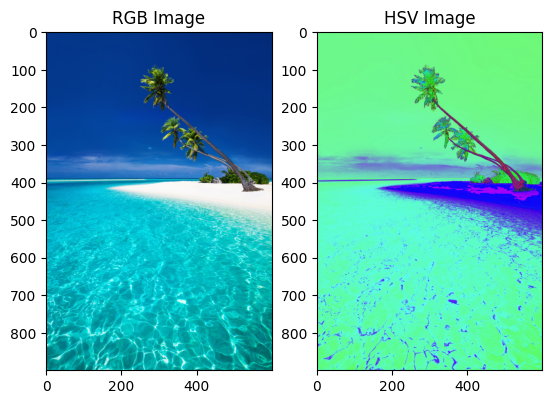

In [2]:
import matplotlib.pyplot as plt

# Load image in RGB
image = cv2.imread('./data/beach-blue.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB to HSV
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Plot both RGB and HSV
# Nrow, Ncol, Index
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('RGB Image')

plt.subplot(1, 2, 2)
plt.imshow(image_hsv)
plt.title('HSV Image')

plt.show()

In [3]:
def rgb_to_hsv(r, g, b): 
  
    # R, G, B values are divided by 255 
    # to change the range from 0..255 to 0..1: 
    r, g, b = r / 255.0, g / 255.0, b / 255.0
  
    # h, s, v = hue, saturation, value 
    cmax = max(r, g, b)    # maximum of r, g, b 
    cmin = min(r, g, b)    # minimum of r, g, b 
    diff = cmax-cmin       # diff of cmax and cmin. 
  
    # if cmax and cmax are equal then h = 0 
    if cmax == cmin:  
        h = 0
      
    # if cmax equal r then compute h 
    elif cmax == r:  
        h = (60 * ((g - b) / diff) + 360) % 360
  
    # if cmax equal g then compute h 
    elif cmax == g: 
        h = (60 * ((b - r) / diff) + 120) % 360
  
    # if cmax equal b then compute h 
    elif cmax == b: 
        h = (60 * ((r - g) / diff) + 240) % 360
  
    # if cmax equal zero 
    if cmax == 0: 
        s = 0
    else: 
        s = (diff / cmax) * 100
  
    # compute v 
    v = cmax * 100
    return h, s, v 
  
  
''' Driver Code '''
# print(rgb_to_hsv(45, 215, 0)) 
# print(rgb_to_hsv(31, 52, 29)) 
  
print(rgb_to_hsv(100, 255, 180)) 

(150.96774193548387, 60.7843137254902, 100.0)


# RGB to HSV Algorithm

1. Divide r,g,b by 255
2. Compute cmax, cmin, difference
3. Hue calculation : 
- if cmax and cmin are equal, then h = 0
- if cmax equal r then compute h = (60 * ((g – b) / diff) + 360) % 360
- if cmax equal g then compute h = (60 * ((b – r) / diff) + 120) % 360
- if cmax equal b then compute h = (60 * ((r – g) / diff) + 240) % 360
4. Saturation computation : 
- if cmax = 0, then s = 0
- if cmax does not equal 0 then compute s = (diff/cmax)*100
5. Value computation
- v = cmax*100


Lets Calculate : 
- RGB value [100, 255, 180] means red = 100, green = 255, blue = 180

1. 
```bash
Red = 100 / 255 ≈ 0.392
Green = 255 / 255 = 1
Blue = 180 / 255 ≈ 0.706
```

2.
```bash
cmax = 1 (Green), cmin = 0.392 (Red), difference = cmax - cmin = 0.608
```
3.
```bash
cmax is green so formula is : h = (60 * ((b – r) / diff) + 120) % 360
h = (60 * ((0.706-0.392) / 0.608) + 120) % 360
h = (60 * (0.314 / 0.608) + 120) % 360
h = (60 * 0.516 + 120) % 360
h = (30.986 + 120) % 360
h = 150.98 % 360
h = 150.98
```
4. 
```bash
s = (0.608/1)*100 = 60.8
```
5. 
```bash
v = 1 * 100 = 100
```
Final
```bash
RGB = (100, 255, 180)
HSV = (151, 60.8, 100) 
(Degree, Percentage, Percentage)
```

In [5]:
(150.98 % 360)

150.98

# Hue, Saturation, Contrast, Shadows

- Hue: The attribute of a color (red, blue, yellow).
- Saturation: The intensity or purity of a color.
- Contrast: The difference between light and dark areas of an image.
- Shadows: The darker areas of an image where details are less visible.

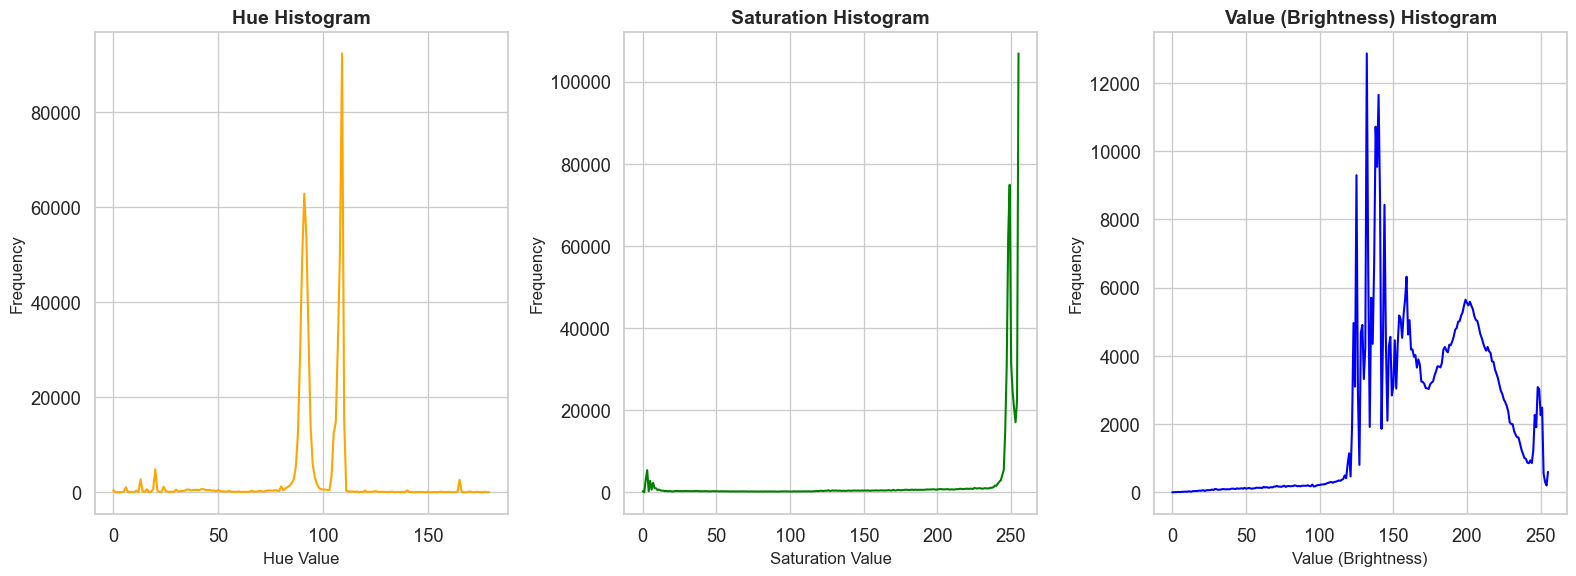

In [ ]:
import numpy as np
import seaborn as sns

# Load the image and convert to HSV
image = cv2.imread('./data/beach-blue.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plot histograms for Hue, Saturation, and Value
hue_hist = cv2.calcHist([image_hsv], [0], None, [180], [0, 180])
saturation_hist = cv2.calcHist([image_hsv], [1], None, [256], [0, 256])
value_hist = cv2.calcHist([image_hsv], [2], None, [256], [0, 256])

warm_val = (hue_hist > 160 & hue_hist < 180) or ()
# Set Seaborn styling
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Plotting
plt.figure(figsize=(16, 6))

# Plot the Hue histogram
plt.subplot(1, 3, 1)
sns.lineplot(x=np.arange(180), y=hue_hist[:, 0], color='orange')
plt.title('Hue Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Hue Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Plot the Saturation histogram
plt.subplot(1, 3, 2)
sns.lineplot(x=np.arange(256), y=saturation_hist[:, 0], color='green')
plt.title('Saturation Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Saturation Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Plot the Value histogram
plt.subplot(1, 3, 3)
sns.lineplot(x=np.arange(256), y=value_hist[:, 0], color='blue')
plt.title('Value (Brightness) Histogram', fontsize=14, fontweight='bold')
plt.xlabel('Value (Brightness)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)

# Adjust the layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


## Hue Histogram
- Hue represents the color type in the HSV color space (e.g., red, blue, green). In OpenCV, the range of hue values is scaled from 0 to 180 (corresponding to 0° to 360° on a color wheel).

In OpenCV, Hue (H) is scaled to a range of 0 to 179 instead of 0 to 360 to accommodate the fact that OpenCV stores HSV values as 8-bit integers (with a range of 0-255).

Hue range is halved (i.e., 360° / 2 = 179)

#### Key Points:
- Peaks in Hue: The spikes in the histogram indicate the dominance of specific hues (colors) in the image. For example, a spike around 120 corresponds to cyan, while 0/180 corresponds to red.
- Flat Distribution: A relatively flat histogram means the image contains a wide variety of colors.
- Narrow Distribution: A narrow distribution with a prominent peak means that the image has a predominant color.

## Saturation Histogram
- Saturation indicates the intensity or purity of colors. The range is from 0 to 255, where:
    - Low values (close to 0) represent more muted, washed-out colors (grays, pastels).
    - High values (closer to 255) represent vivid, saturated colors (rich reds, blues, etc.).

#### Key Points:
- High Saturation Values: If the histogram has significant values in the higher range (toward 255), this indicates that the image contains vibrant, highly saturated colors.
- Low Saturation Values: A histogram skewed toward lower values means the image has more muted or pastel-like colors. Images with low saturation may look more grayish or have faded colors.

## Value (Brightness) Histogram
- Value represents the brightness or luminance of the image. Like saturation, its range is from 0 to 255, where:
    - Low values (near 0) mean darker pixels (shadows, black areas).
    - High values (near 255) mean brighter pixels (highlights, white areas).

#### Key Points:
- Peaks in the Lower Range: If you see a peak toward the left of the histogram (lower values), the image has a lot of dark regions (shadows, low-light areas).
- Peaks in the Higher Range: A peak toward the right indicates that the image contains many bright regions (sunlit areas, light sources).
- Balanced Distribution: A balanced histogram spread across the value range suggests that the image contains a good balance between bright, dark, and mid-tones.

## Summary 

- Hue (H): 0 to 179
- Saturation (S): 0 to 255
- Value (V): 0 to 255

- Hue Histogram: The peaks may show around the yellow/orange range (30-60), as sunsets have warm tones. You may also see secondary peaks for the blue sky (around 120).
- Saturation Histogram: You may see values both low and high. The sky might be desaturated (less intense), while the setting sun and clouds could have vivid orange hues (high saturation).
- Value Histogram: Expect more balanced values. The sky might be bright, so there will be some peaks toward the right (higher brightness), but the ground and shadows in the landscape might push some values toward the lower end.

## Interpretation

- Vibrant Image (e.g., flowers, neon lights): Expect high saturation, balanced hue distribution, and brightness across the entire range.
- Muted Image (e.g., foggy scene): Low saturation and low to mid-brightness. The hue histogram might show fewer colors.
- Overexposed Image (e.g., too much sunlight): Brightness histogram will peak near the right end, suggesting loss of detail in highlights.
- Underexposed Image (e.g., low-light room): Brightness histogram will peak near the left end, indicating loss of detail in shadows.
